# Dataset Checking and Cleaning

The dataset used in this project is survey data from BRFSS in 2021. This BRFSS dataset contains 438,693 records. We only take a few variables in this dataset that are related to a person's lifestyle and its relationship with any cardiovascular disease. This dataset is originally in SAS Transport Formats. We converted it from SAS Transport Formats data to csv to make it lighter and easier to use.

The method of retrieving this dataset was inspired by [1] which also retrieved data from BRFSS to examine its relationship with cardiovascular disease. However, we customized the variables used. There are some variables that we added or subtracted from reference [1]. Furthermore, to understand the meaning of each variable code, we read the more detailed questionnaire in [2](https://www.cdc.gov/brfss/questionnaires/pdf-ques/2021-BRFSS-Questionnaire-1-19-2022-508.pdf). 

[1] Lupague R.M.J.M., Mabborang R.C., Bansil A.G., Lupague M.M. (2023) Integrated Machine Learning Model for Comprehensive Heart Disease Risk Assessment Based on Multi-Dimensional Health Factors, European Journal of Computer Science and Information Technology, 11 (3), 44-58

## Import SAS XPT data to Pandas DataFrame

In [25]:
import pandas as pd

df = pd.read_sas("./dataset/LLCP2021.XPT")

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3495794759.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas("./dataset/LLCP2021.XPT")
C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3495794759.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas("./dataset/LLCP2021.XPT")
C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3495794759.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [26]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


## SAS XPT Data Checking

Furthermore, when checking related to empty data in this dataset, it is found as follows

In [27]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[:50]

_STATE       0.000000
FMONTH       0.000000
IDATE        0.000000
IMONTH       0.000000
IDAY         0.000000
IYEAR        0.000000
DISPCODE     0.000000
SEQNO        0.000000
_PSU         0.000000
CTELENM1    73.150700
PVTRESD1    73.150700
COLGHOUS    99.993162
STATERE1    73.150700
CELPHON1    73.150700
LADULT1     73.150700
COLGSEX     99.993162
NUMADULT    73.155031
LANDSEX     88.637612
NUMMEN      85.083418
NUMWOMEN    85.083418
RESPSLCT    85.259851
SAFETIME    26.849300
CTELNUM1    26.849528
CELLFON5    26.849300
CADULT1     26.849300
CELLSEX     26.849756
PVTRESD3    26.849300
CCLGHOUS    99.713923
CSTATE1     26.849300
LANDLINE    26.849300
HHADULT     26.849756
SEXVAR       0.000000
GENHLTH      0.000912
PHYSHLTH     0.000684
MENTHLTH     0.000456
POORHLTH    46.793316
PRIMINSR     0.000684
PERSDOC3     0.000456
MEDCOST1     0.001140
CHECKUP1     0.000456
EXERANY2     0.000456
BPHIGH6      0.000456
BPMEDS      60.762310
CHOLCHK3     0.000456
TOLDHI3     13.867557
CHOLMED3  

In [28]:
percent_missing[50:100]

ASTHNOW     85.980629
CHCSCNCR     0.000456
CHCOCNCR     0.000684
CHCCOPD3     0.000684
ADDEPEV3     0.000684
CHCKDNY2     0.000684
DIABETE4     0.000684
DIABAGE3    86.866670
HAVARTH5     0.000684
ARTHEXER    67.507802
ARTHEDU     67.507802
LMTJOIN3    67.507802
ARTHDIS2    67.508030
JOINPAI2    67.508257
MARITAL      0.001140
EDUCA        0.001140
RENTHOM1     0.001824
NUMHHOL3    73.151384
NUMPHON3    92.748232
CPDEMO1B     0.066561
VETERAN3     0.372926
EMPLOY1      0.817884
CHILDREN     1.398472
INCOME3      2.016672
PREGNANT    81.610830
WEIGHT2      2.693455
HEIGHT3      2.954002
DEAF         3.328524
BLIND        3.588842
DECIDE       3.839359
DIFFWALK     4.105149
DIFFDRES     4.282266
DIFFALON     4.525488
SMOKE100     4.839831
SMOKDAY2    61.829115
USENOW3      5.012389
ECIGNOW1     5.248545
ALCDAY5      5.581808
AVEDRNK3    52.034338
DRNK3GE5    52.170424
MAXDRNKS    52.298532
FLUSHOT7     6.302357
FLSHTMY3    51.757607
IMFVPLA2    52.496849
PNEUVAC4     6.630377
HIVTST7   

In [29]:
percent_missing[100:150]

FRENCHF1      8.687396
POTATOE1      8.959796
VEGETAB2      9.258183
PDIABTST     73.872845
PREDIAB1     73.873073
INSULIN1     94.930851
BLDSUGAR     94.930623
FEETCHK3     94.931991
DOCTDIAB     94.932675
CHKHEMO3     94.932903
FEETCHK      94.970743
EYEEXAM1     94.933815
DIABEYE      94.934499
DIABEDU      94.934727
TOLDCFS     100.000000
HAVECFS     100.000000
WORKCFS     100.000000
TOLDHEPC     97.537230
TRETHEPC     99.963072
PRIRHEPC     99.963072
HAVEHEPC     99.963072
HAVEHEPB     97.542929
MEDSHEPB     99.978345
HPVADVC4     96.965076
HPVADSHT     99.427846
TETANUS1     96.608790
SHINGLE2     96.910824
LCSFIRST     97.144472
LCSLAST      97.237704
LCSNUMCG     97.242035
LCSCTSCN     93.124805
HADMAM       97.829234
HOWLONG      98.300406
CERVSCRN     97.832653
CRVCLCNC     98.886921
CRVCLPAP     98.895355
CRVCLHPV     98.891252
HADHYST2     97.857271
PSATEST1     99.486657
PSATIME1     99.744696
PCPSARS2     99.744924
PCSTALK      99.745380
HADSIGM4     98.227234
COLNSIGM   

In [30]:
percent_missing[150:200]

SMALSTOL    99.631633
STOLTEST    99.719394
STOOLDN1    99.631861
BLDSTFIT    99.911100
SDNATES1    99.911100
CNCRDIFF    97.728936
CNCRAGE     97.766775
CNCRTYP1    97.768827
CSRVTRT3    98.331635
CSRVDOC1    98.987447
CSRVSUM     98.989042
CSRVRTRN    98.990182
CSRVINST    99.229757
CSRVINSR    98.991094
CSRVDEIN    98.991550
CSRVCLIN    98.992234
CSRVPAIN    97.944804
CSRVCTL2    99.806015
HOMBPCHK    71.278092
HOMRGCHK    71.285386
WHEREBP     90.987319
SHAREBP     90.990282
WTCHSALT    91.768959
DRADVISE    91.775570
CIMEMLOS    92.443235
CDHOUSE     99.004087
CDASSIST    99.005911
CDHELP      99.708452
CDSOCIAL    99.008190
CDDISCUS    99.009558
CAREGIV1    57.093457
CRGVREL4    91.155318
CRGVLNG1    91.174466
CRGVHRS1    91.194070
CRGVPRB3    91.220740
CRGVALZD    92.096067
CRGVPER1    91.260403
CRGVHOU1    91.276132
CRGVEXPT    66.079468
ACEDEPRS    86.604983
ACEDRINK    86.631426
ACEDRUGS    86.638264
ACEPRISN    86.646926
ACEDIVRC    86.654221
ACEPUNCH    86.663794
ACEHURT1  

In [31]:
percent_missing[200:250]

ACEADSAF    86.731952
ACEADNED    86.743349
MARIJAN1    68.643220
USEMRJN3    96.912191
RSNMRJN2    96.915383
LASTSMK2    88.180117
STOPSMK2    94.515071
FIREARM5    93.032029
GUNLOAD     97.229498
LOADULK2    99.015941
RCSGENDR    86.993866
RCSRLTN2    87.079803
CASTHDX2    87.504018
CASTHNO2    98.685641
BIRTHSEX    77.546485
SOMALE      73.975194
SOFEMALE    70.065855
TRNSGNDR    43.982694
QSTVER       0.000000
QSTLANG      0.000000
_METSTAT     1.607958
_URBSTAT     1.607958
MSCODE      73.563973
_STSTR       0.000000
_STRWT       0.000000
_RAWRAKE     0.000000
_WT2RAKE     0.000000
_IMPRACE     0.000000
_CHISPNC    28.908371
_CRACE1     86.391622
_CPRACE1    86.391622
CAGEG       88.926197
_CLLCPWT    86.985432
_DUALUSE     0.000000
_DUALCOR    60.398730
_LLCPWT2     0.000000
_LLCPWT      0.000000
_RFHLTH      0.000000
_PHYS14D     0.000000
_MENT14D     0.000000
_HLTHPLN     0.000000
_HCVU652     0.000000
_TOTINDA     0.000000
_RFHYPE6     0.000000
_CHOLCH3     0.000000
_RFCHOL3  

In [32]:
percent_missing[250:]

_DRDXAR3     0.660143
_LMTACT3     0.660143
_LMTWRK3     0.660143
_PRACE1      0.000912
_MRACE1      0.000912
_HISPANC     0.000000
_RACE        0.000000
_RACEG21     0.000000
_RACEGR3     0.000000
_RACEPRV     0.000000
_SEX         0.000000
_AGEG5YR     0.000000
_AGE65YR     0.000000
_AGE80       0.000000
_AGE_G       0.000000
HTIN4        6.188838
HTM4         5.598904
WTKG3        9.252028
_BMI5       10.679906
_BMI5CAT    10.679906
_RFBMI5      0.000000
_CHLDCNT     0.000000
_EDUCAG      0.000000
_INCOMG1     0.000000
_SMOKER3     0.000000
_RFSMOK3     0.000000
_CURECI1     0.000000
DRNKANY5     0.000000
DROCDY3_     0.000000
_RFBING5     0.000000
_DRNKWK1     0.000000
_RFDRHV7     0.000000
_FLSHOT7    62.948349
_PNEUMO3    62.948349
_AIDTST4     6.872916
FTJUDA2_    10.109348
FRUTDA2_    10.018624
GRENDA1_    10.086781
FRNCHDA_    10.204175
POTADA1_    11.041890
VEGEDA2_    11.061950
_MISFRT1     0.000000
_MISVEG1     0.000000
_FRTRES1     0.000000
_VEGRES1     0.000000
_FRUTSU1  

## Data Cleaning Process

### Data Filtering

As mentioned earlier, we took only a few variables that could show how a person's lifestyle and health condition is. Based on reference [3](https://www.nhs.uk/conditions/cardiovascular-disease/), we also use several other variables that can be a possible risk of cardiovascular disease. The variables that we use are as follows
1. GENHLTH 
- Q : Would you say that in general your health is- 
- A: 1 Excellent, 2 Very Good, 3 Good, 4 Fair, 5 Poor, 7 Don't know/Not sure, 9 Refused
2. PHYSHLTH
- Q : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- A : _ _ Number of days (01-30), 88 None, 77 Don’t know/not sure, 99 Refused
3. MENTHLTH
- Q : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- A : _ _ Number of days (01-30), 88 None, 77 Don’t know/not sure, 99 Refused
4. POORHLTH
- Q : During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? 
- A : _ _ Number of days (01-30), 88 None, 77 Don’t know/not sure, 99 Refused
5. CHECKUP1
- Q : About how long has it been since you last visited a doctor for a routine checkup?
- A : 1 Within the past year (anytime less than 12 months ago), 2 Within the past, 2 years (1 year but less than 2 years ago), 3 Within the past, 5 years (2 years but less than 5 years ago), 4 5 or more years ago, 7 Don’t know / Not sure, 8 Never, 9 Refused
6. EXERANY2
- Q : During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?
- A : 1 Yes, 2 No, 7 Don’t know / Not sure, 9 Refused
7. BPHIGH6
- Q : Have you ever been told by a doctor, nurse, or other health professional that you have high blood pressure?
- A : 1 Yes, 2 Yes, but female told only during pregnancy, 3 No, 4 Told borderline high or pre- hypertensive or elevated blood pressure, 7 Don’t know / Not sure, 9 Refused
8. TOLDHI3
- Q : Have you ever been told by a doctor, nurse or other health professional that your cholesterol is high?
- A : 1 Yes, 2 No, 7 Don’t know / Not sure, 9 Refused
9. CVDINFR4
- Q : Ever told you that you had a heart attack also called a myocardial infarction?
- A : 1 Yes, 2 No, 7 Don’t know / Not sure, 9 Refused
10. CVDCRHD4
- Q : (Ever told) (you had) angina or coronary heart disease?
- A : 1 Yes, 2 No, 7 Don’t know / Not sure, 9 Refused
11. CVDSTRK3
- Q : (Ever told) (you had) a stroke?
- A : 1 Yes, 2 No, 7 Don’t know / Not sure, 9 Refused
12. DIABETE4
- Q : (Ever told) (you had) diabetes?
- A : 1 Yes, 2 Yes, but female told only during pregnancy, 3 No, 4 No, pre- diabetes or borderline diabetes, 7 Don’t know / Not sure, 9 Refused
13. DIABAGE3
- Q : How old were you when you were told you had diabetes?
- A : _ _ Code age in years [97 = 97 and older], 98 Don‘t know / Not sure, 99 Refused
14. AGE
- Q : What is your age?
- A : _ _ Code age in years, 07 Don’t know / Not sure, 09 Refused
15. WEIGHT2
- Q : About how much do you weigh without shoes?
- A : _ _ _ _ Weight (pounds/kilograms), 7777 Don’t know / Not sure, 9999 Refused
16. HEIGHT3
- Q : About how tall are you without shoes?
- A : _ _ / _ _ Height (ft / inches/meters/centimeters) 77/ 77 Don’t know / Not sure 99 / 99 Refused
17. SMOKE100
- Q : Have you smoked at least 100 cigarettes in your entire life?
- A : 1 Yes, 2 No, 7 Don’t know/Not Sure, 9 Refused
18. SMOKDAY2
- Q : Do you now smoke cigarettes every day, some days, or not at all?
- A : 1 Every day, 2 Some days, 3 Not at all, 7 Don’t know / Not sure, 9 Refused
19. USENOW3
- Q : Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?
- A : 1 Every day, 2 Some days, 3 Not at all, 7 Don’t know / Not sure, 9 Refused
20. ECIGNOW1
- Q : Do you now use e-cigarettes or other electronic vaping products every day, some days or not at all?
- A : 1 Every day, 2 Some days, 3 Not at all, 4 Never used e-cigs, 7 Don’t know / Not sure, 9 Refused
21. ALCDAY5
- Q : During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?
- A : 1 _ _ Days per week, 2 _ _ Days in past 30 days, 888 No drinks in past 30 days, 777 Don’t know / Not sure, 999 Refused
22. AVEDRNK3
- Q : One drink is equivalent to a 12-ounce beer, a 5-ounce glass of wine, or a drink with one shot of liquor. During the past 30 days, on the days when you drank, about how many drinks did you drink on the average?
- A : _ _ Number of drinks, 88 None, 77 Don’t know / Not sure, 99 Refused
23. DRNK3GE5
- Q : Considering all types of alcoholic beverages, how many times during the past 30 days did you have X [CATI X = 5 for men, X = 4 for women] or more drinks on an occasion?
- A : _ _ Number of times, 77 Don’t know / Not sure, 88 no days, 99 Refused
24. MAXDRNKS
- Q : During the past 30 days, what is the largest number of drinks you had on any occasion?
- A : _ _ Number of drinks, 77 Don’t know / Not sure, 99 Refused
25. FRUIT2
- Q : Now think about the foods you ate or drank during the past month, that is, the past 30 days, including meals and snacks. Not including juices, how often did you eat fruit? You can tell me times per day, times per week or times per month.
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than, once a month, 555 Never, 777 Don’t Know, 999 Refused
26. FRUITJU2
- Q : Not including fruit-flavored drinks or fruit juices with added sugar, how often did you drink 100% fruit juice such as apple or orange juice?
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than, once a month, 555 Never, 777 Don’t Know, 999 Refused
27. FVGREEN1
- Q : How often did you eat a green leafy or lettuce salad, with or without other vegetables?
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than once a month, 555 Never, 777 Don’t Know, 999 Refused
28. FRENCHF1
- Q : How often did you eat any kind of fried potatoes, including French fries, home fries, or hash browns?
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than once a month, 555 Never, 777 Don’t Know, 999 Refused
29. POTATOE1
- Q : How often did you eat any other kind of potatoes, or sweet potatoes, such as baked, boiled, mashed potatoes, or potato salad?
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than once a month, 555 Never, 777 Don’t Know, 999 Refused
30. VEGETAB2
- Q : Not including lettuce salads and potatoes, how often did you eat other vegetables?
- A : 1_ _ Day, 2_ _ Week, 3_ _ Month, 300 Less than once a month, 555 Never, 777 Don’t Know, 999 Refused
31. WTCHSALT
- Q : Are you currently watching or reducing your sodium or salt intake?
- A : 1 Yes, 2 No, 7 Don’t know/ Not sure, 9 Refused
32. BIRTHSEX
- Q : What was your sex at birth? Was it male or female?
- A : 1 Male, 2 Female, 7 Don’t know/Not sure, 9 Refused

In [33]:
df_clean = df[["GENHLTH", "PHYSHLTH", "MENTHLTH", "POORHLTH", "CHECKUP1", "EXERANY2", "BPHIGH6", "TOLDHI3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "DIABETE4", "DIABAGE3", "_AGE80", "WEIGHT2", "HEIGHT3", "SMOKE100", "SMOKDAY2", "USENOW3", "ECIGNOW1", "ALCDAY5", "AVEDRNK3", "DRNK3GE5", "MAXDRNKS", "FRUIT2", "FRUITJU2", "FVGREEN1", "FRENCHF1", "POTATOE1", "VEGETAB2", "WTCHSALT", "BIRTHSEX"]] 

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   438689 non-null  float64
 1   PHYSHLTH  438690 non-null  float64
 2   MENTHLTH  438691 non-null  float64
 3   POORHLTH  233414 non-null  float64
 4   CHECKUP1  438691 non-null  float64
 5   EXERANY2  438691 non-null  float64
 6   BPHIGH6   438691 non-null  float64
 7   TOLDHI3   377857 non-null  float64
 8   CVDINFR4  438691 non-null  float64
 9   CVDCRHD4  438691 non-null  float64
 10  CVDSTRK3  438691 non-null  float64
 11  DIABETE4  438690 non-null  float64
 12  DIABAGE3  57615 non-null   float64
 13  _AGE80    438693 non-null  float64
 14  WEIGHT2   426877 non-null  float64
 15  HEIGHT3   425734 non-null  float64
 16  SMOKE100  417461 non-null  float64
 17  SMOKDAY2  167453 non-null  float64
 18  USENOW3   416704 non-null  float64
 19  ECIGNOW1  415668 non-null  float64
 20  ALCD

### Filtered Data Checking

We have to check if there is any missing data in the new data.

In [35]:
percent_missing = df_clean.isnull().sum() * 100 / len(df_clean)
percent_missing

GENHLTH      0.000912
PHYSHLTH     0.000684
MENTHLTH     0.000456
POORHLTH    46.793316
CHECKUP1     0.000456
EXERANY2     0.000456
BPHIGH6      0.000456
TOLDHI3     13.867557
CVDINFR4     0.000456
CVDCRHD4     0.000456
CVDSTRK3     0.000456
DIABETE4     0.000684
DIABAGE3    86.866670
_AGE80       0.000000
WEIGHT2      2.693455
HEIGHT3      2.954002
SMOKE100     4.839831
SMOKDAY2    61.829115
USENOW3      5.012389
ECIGNOW1     5.248545
ALCDAY5      5.581808
AVEDRNK3    52.034338
DRNK3GE5    52.170424
MAXDRNKS    52.298532
FRUIT2       7.790186
FRUITJU2     8.151942
FVGREEN1     8.433004
FRENCHF1     8.687396
POTATOE1     8.959796
VEGETAB2     9.258183
WTCHSALT    91.768959
BIRTHSEX    77.546485
dtype: float64

### Further Data Cleaning

We found that some of the variable has a big percentage of NaN value. List of the variables that has more than 50% NaN values as follows:
- DIABAGE3: 86.866670
- SMOKDAY2: 61.829115
- AVEDRNK3: 52.034338
- DRNK3GE5: 52.170424
- MAXDRNKS: 52.298532
- WTCHSALT: 91.768959
- BIRTHSEX: 77.546485

We need to address these issues. The choice is either not to use the variable or use a certain technique to fill in the missing variable. 
- If we look deeper, variables with a very large percentage of missing numbers such as DIABAGE3 and WTCHSALT should be dropped. 
- Especially for the BIRTHSEX variable, it turns out that there is a SEXVAR variable that seems to combine the three parts of the BIRTHSEX, CELLSEX and LANDSEX surveys, resulting in preprocessed data with a unique value of only 1 for men and 2 for women. This SEXVAR variable also has no NaN value. Therefore, BIRTHSEX can be replaced with SEXVAR. 
- Then for the SMOKDAY2 variable because it is far above 50%, we decided to drop it. Meanwhile, we will leave the variable whose percentage of missing values is still around 50%.

#### Checking SEXVAR Data

In [36]:
df["SEXVAR"].isna().sum()

0

In [37]:
df["SEXVAR"].value_counts()

2.0    234883
1.0    203810
Name: SEXVAR, dtype: int64

#### Proceed the Data Cleaning Method

In [38]:
df_clean["SEXVAR"] = df["SEXVAR"]
df_clean.drop(["DIABAGE3", "WTCHSALT", "BIRTHSEX", "SMOKDAY2"], axis=1, inplace=True)
df_clean.head()

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3859604402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["SEXVAR"] = df["SEXVAR"]
C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3859604402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(["DIABAGE3", "WTCHSALT", "BIRTHSEX", "SMOKDAY2"], axis=1, inplace=True)


,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,CHECKUP1,EXERANY2,BPHIGH6,TOLDHI3,CVDINFR4,CVDCRHD4,...,AVEDRNK3,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,SEXVAR
0,5.0,20.0,10.0,88.0,2.0,2.0,3.0,1.0,2.0,2.0,...,NaN,NaN,NaN,101.0,555.0,204.0,203.0,201.0,101.0,2.0
1,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,101.0,555.0,201.0,555.0,201.0,207.0,2.0
2,2.0,88.0,88.0,NaN,1.0,2.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,101.0,555.0,555.0,201.0,201.0,203.0,2.0
3,2.0,88.0,10.0,88.0,1.0,1.0,1.0,1.0,2.0,2.0,...,3.0,1.0,6.0,203.0,205.0,303.0,204.0,308.0,205.0,2.0
4,5.0,30.0,88.0,30.0,1.0,1.0,4.0,1.0,1.0,7.0,...,NaN,NaN,NaN,101.0,555.0,101.0,202.0,202.0,101.0,1.0


### Drop NaN Rows

In [39]:
df_clean.dropna(inplace=True)
df_clean.head()

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\406832494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,CHECKUP1,EXERANY2,BPHIGH6,TOLDHI3,CVDINFR4,CVDCRHD4,...,AVEDRNK3,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,SEXVAR
3,2.0,88.0,10.0,88.0,1.0,1.0,1.0,1.0,2.0,2.0,...,3.0,1.0,6.0,203.0,205.0,303.0,204.0,308.0,205.0,2.0
9,3.0,25.0,5.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,88.0,2.0,101.0,555.0,202.0,202.0,203.0,204.0,2.0
36,3.0,2.0,88.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,1.0,88.0,2.0,202.0,101.0,204.0,201.0,205.0,330.0,2.0
44,4.0,88.0,5.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,...,1.0,88.0,1.0,102.0,201.0,301.0,302.0,202.0,102.0,2.0
50,3.0,30.0,88.0,30.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,88.0,1.0,300.0,207.0,315.0,315.0,555.0,555.0,1.0


### Advanced Data Cleaning Process

After handling missing data, the process that can be done is to handle the data coding in each column according to the explanation in [2](https://www.cdc.gov/brfss/questionnaires/pdf-ques/2021-BRFSS-Questionnaire-1-19-2022-508.pdf). We will change the coding that tends to be complicated in this data such as in the WEIGHT2 and HEIGHT3 columns to equalize the metrics used. Furthermore, also in the columns ALCDAY5, FRUIT2, FRUITJU2, FVGREEN1, FRENCHF1, POTATOE1, and VEGETAB2, we will convert the time unit because the time unit is different. 

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91576 entries, 3 to 438692
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   91576 non-null  float64
 1   PHYSHLTH  91576 non-null  float64
 2   MENTHLTH  91576 non-null  float64
 3   POORHLTH  91576 non-null  float64
 4   CHECKUP1  91576 non-null  float64
 5   EXERANY2  91576 non-null  float64
 6   BPHIGH6   91576 non-null  float64
 7   TOLDHI3   91576 non-null  float64
 8   CVDINFR4  91576 non-null  float64
 9   CVDCRHD4  91576 non-null  float64
 10  CVDSTRK3  91576 non-null  float64
 11  DIABETE4  91576 non-null  float64
 12  _AGE80    91576 non-null  float64
 13  WEIGHT2   91576 non-null  float64
 14  HEIGHT3   91576 non-null  float64
 15  SMOKE100  91576 non-null  float64
 16  USENOW3   91576 non-null  float64
 17  ECIGNOW1  91576 non-null  float64
 18  ALCDAY5   91576 non-null  float64
 19  AVEDRNK3  91576 non-null  float64
 20  DRNK3GE5  91576 non-null  f

#### WEIGHT2

Convert pounds to kg

In [41]:
def convert_weight(weight):
    return weight / 2.205

# Apply the conversion function to values in the "WEIGHT2" column less than 7777
df_clean.loc[df_clean['WEIGHT2'] < 7777, 'WEIGHT2'] = df_clean.loc[df_clean['WEIGHT2'] < 7777, 'WEIGHT2'].apply(convert_weight)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\1404950880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['WEIGHT2'] < 7777, 'WEIGHT2'] = df_clean.loc[df_clean['WEIGHT2'] < 7777, 'WEIGHT2'].apply(convert_weight)


<Axes: >

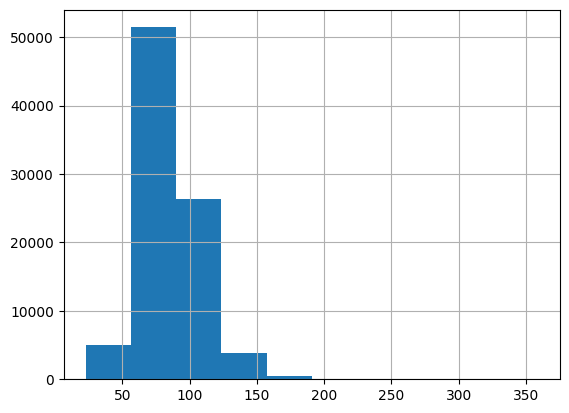

In [42]:
df_clean["WEIGHT2"][df_clean["WEIGHT2"]<7777].hist()

#### HEIGHT3

Convert feet inches to centimeters

In [43]:
# Define a function to convert feet and inches to centimeters
def feet_inches_to_cm(height):
    feet = int(height / 100)  # Extract feet (first two digits)
    inches = int(height % 100)  # Extract inches (last two digits)
    total_inches = feet * 12 + inches  # Convert feet and inches to total inches
    return total_inches * 2.54  # Convert total inches to centimeters

# Apply the conversion function to values in the "HEIGHT3" column less than 7777
df_clean.loc[df_clean['HEIGHT3'] < 7777, 'HEIGHT3'] = df_clean.loc[df_clean['HEIGHT3'] < 7777, 'HEIGHT3'].apply(feet_inches_to_cm)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\4149097663.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['HEIGHT3'] < 7777, 'HEIGHT3'] = df_clean.loc[df_clean['HEIGHT3'] < 7777, 'HEIGHT3'].apply(feet_inches_to_cm)


<Axes: >

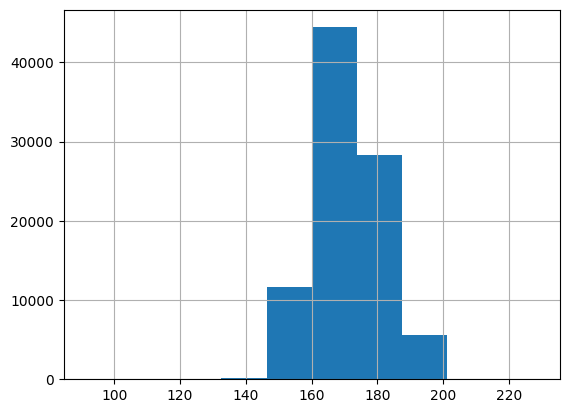

In [44]:
df_clean["HEIGHT3"][df_clean["HEIGHT3"]<7777].hist()

#### ALCDAY5

Convert to X days in past 30 days

In [45]:
# Define a function to convert ALCDAY5 codes to days in past 30 days
def convert_ALCDAY5_to_days_in_past_30_days(code):
    code_str = str(int(code))  # Convert to string
    if code_str.startswith('1'):
        days_per_week = int(code_str[1:])
        if days_per_week > 0:
            return days_per_week * 4  # Convert days per week to days per month (4 weeks)
    elif code_str.startswith('2'):
        days_in_past_30_days = int(code_str[1:])
        if days_in_past_30_days > 0:
            return days_in_past_30_days
    return code
    
# Apply the conversion function to the ALCDAY5 column
df_clean["ALCDAY5"] = df_clean["ALCDAY5"].apply(convert_ALCDAY5_to_days_in_past_30_days)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\1902438635.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["ALCDAY5"] = df_clean["ALCDAY5"].apply(convert_ALCDAY5_to_days_in_past_30_days)


<Axes: >

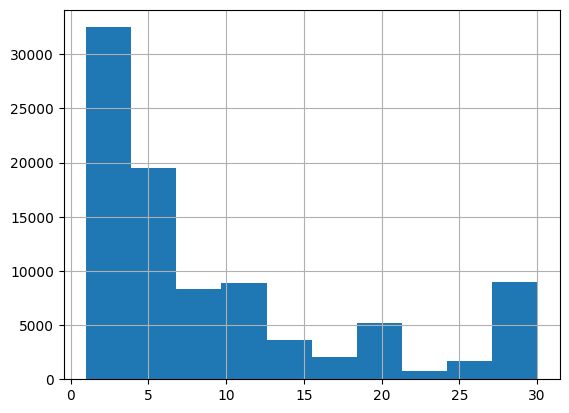

In [46]:
df_clean["ALCDAY5"][df_clean["ALCDAY5"]<888].hist()

#### FRUIT2

Convert to monthly fruit consumption

In [47]:
# Define a function to convert FRUIT2 codes to monthly frequency
def convert_to_monthly(code):
    code_str = str(int(code))  # Convert to string
    if code_str.startswith('1'):
        days = int(code_str[1:])
        if days > 0:
            return days * 30  # Convert days consumption to month consumption
    elif code_str.startswith('2'):
        week = int(code_str[1:])
        if week > 0:
            return week * 4 # Convert days consumption to month consumption
    elif code_str.startswith('3'):
        month = int(code_str[1:])
        if month > 0:
            return month
    return code

df_clean["FRUIT2"] = df_clean["FRUIT2"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\1066369042.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["FRUIT2"] = df_clean["FRUIT2"].apply(convert_to_monthly)


<Axes: >

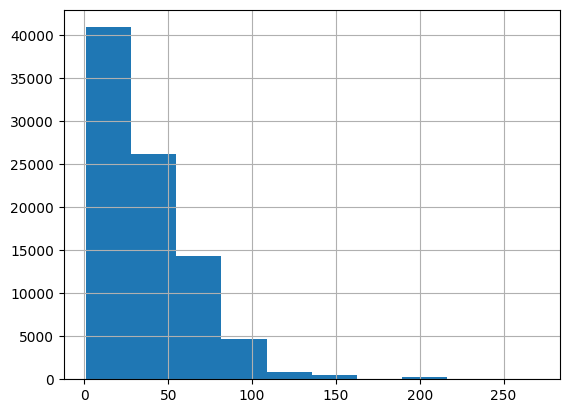

In [52]:
df_clean["FRUIT2"][df_clean["FRUIT2"]<300].hist()

#### FRUITJU2

Convert to monthly fruit juice consumption

In [49]:
df_clean["FRUITJU2"] = df_clean["FRUITJU2"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\2261714451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["FRUITJU2"] = df_clean["FRUITJU2"].apply(convert_to_monthly)


<Axes: >

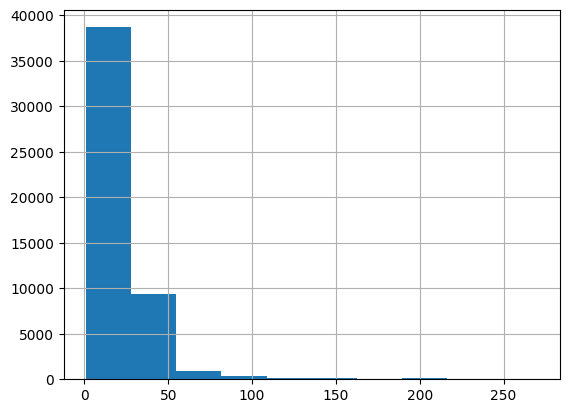

In [53]:
df_clean["FRUITJU2"][df_clean["FRUITJU2"]<300].hist()

#### FVGREEN1

Convert to monthly green vegetables consumption

In [59]:
df_clean["FVGREEN1"] = df_clean["FVGREEN1"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3949347441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["FVGREEN1"] = df_clean["FVGREEN1"].apply(convert_to_monthly)


<Axes: >

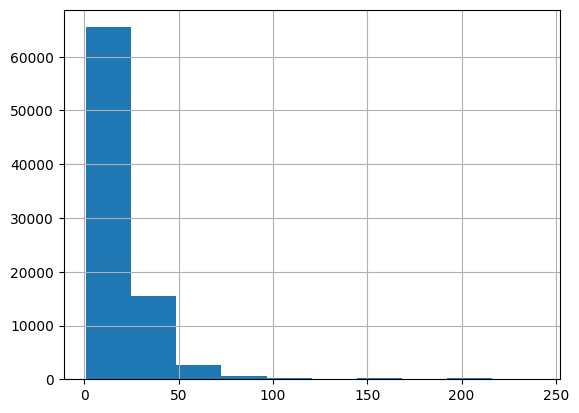

In [60]:
df_clean["FVGREEN1"][df_clean["FVGREEN1"]<300].hist()

#### FRENCHF1

Convert to monthly fried potatoes consumption

In [61]:
df_clean["FRENCHF1"] = df_clean["FRENCHF1"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\2629540880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["FRENCHF1"] = df_clean["FRENCHF1"].apply(convert_to_monthly)


<Axes: >

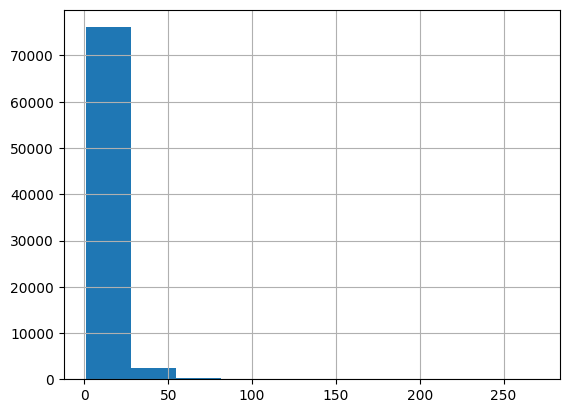

In [62]:
df_clean["FRENCHF1"][df_clean["FRENCHF1"]<300].hist()

#### POTATOE1

Convert to monthly other potatoes consumption

In [63]:
df_clean["POTATOE1"] = df_clean["POTATOE1"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\3370581661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["POTATOE1"] = df_clean["POTATOE1"].apply(convert_to_monthly)


<Axes: >

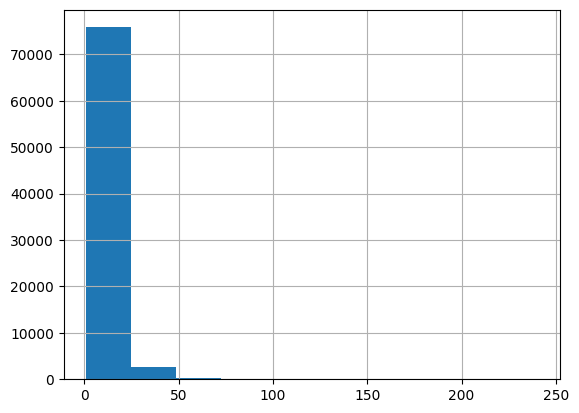

In [64]:
df_clean["POTATOE1"][df_clean["POTATOE1"]<300].hist()

#### VEGETAB2

Convert to monthly other vegetables consumption

In [65]:
df_clean["VEGETAB2"] = df_clean["VEGETAB2"].apply(convert_to_monthly)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_3992\1205986655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["VEGETAB2"] = df_clean["VEGETAB2"].apply(convert_to_monthly)


<Axes: >

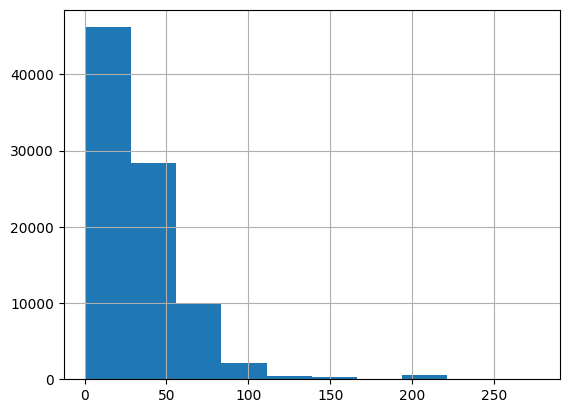

In [66]:
df_clean["VEGETAB2"][df_clean["VEGETAB2"]<300].hist()

#### CVD Preprocessing

We also need to pre-process cardiovascular disease into a column that indicates whether there is cardiovascular disease or not. So we need to use logical or in the three column related to cardiovascular disease (CVDINFR4, CVDCRHD4, CVDSTRK3) to create a new column that indicates whether cardiovascular disease is present or not.

In [72]:
df_clean = df_clean.loc[(df_clean["CVDINFR4"] != 7) & (df_clean["CVDINFR4"] != 9) & (df_clean["CVDCRHD4"] != 7) 
                        & (df_clean["CVDCRHD4"] != 9) & (df_clean["CVDSTRK3"] != 7) & (df_clean["CVDSTRK3"] != 9)]

In [75]:
df_clean["CVDINFR4"].value_counts()

2.0    86498
1.0     3914
Name: CVDINFR4, dtype: int64

In [73]:
df_clean["CVDCRHD4"].value_counts()

2.0    85986
1.0     4426
Name: CVDCRHD4, dtype: int64

In [74]:
df_clean["CVDSTRK3"].value_counts()

2.0    87428
1.0     2984
Name: CVDSTRK3, dtype: int64

In [78]:
df_clean['CVD'] = (df_clean["CVDINFR4"] == 1) | (df_clean["CVDCRHD4"] == 1) | (df_clean["CVDSTRK3"] == 1)

In [79]:
df_clean['CVD'].value_counts()

False    82004
True      8408
Name: CVD, dtype: int64

### Data Cleaning Saving Checkpoints

Now we get some pretty clean data. The data only contains encodings that can be easily handled later. We can save this data first as a checkpoint so that subsequent pre-processing can simply load from this checkpoint.

In [86]:
df_clean.to_csv("./dataset/dataset_cp.csv", index=False)

In [88]:
temp = pd.read_csv("./dataset/dataset_cp.csv")
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90412 entries, 0 to 90411
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   90412 non-null  float64
 1   PHYSHLTH  90412 non-null  float64
 2   MENTHLTH  90412 non-null  float64
 3   POORHLTH  90412 non-null  float64
 4   CHECKUP1  90412 non-null  float64
 5   EXERANY2  90412 non-null  float64
 6   BPHIGH6   90412 non-null  float64
 7   TOLDHI3   90412 non-null  float64
 8   CVDINFR4  90412 non-null  float64
 9   CVDCRHD4  90412 non-null  float64
 10  CVDSTRK3  90412 non-null  float64
 11  DIABETE4  90412 non-null  float64
 12  _AGE80    90412 non-null  float64
 13  WEIGHT2   90412 non-null  float64
 14  HEIGHT3   90412 non-null  float64
 15  SMOKE100  90412 non-null  float64
 16  USENOW3   90412 non-null  float64
 17  ECIGNOW1  90412 non-null  float64
 18  ALCDAY5   90412 non-null  int64  
 19  AVEDRNK3  90412 non-null  float64
 20  DRNK3GE5  90412 non-null  fl

## Save Final Clean Data

At this point we have clean data that has been processed so that we can save the data into csv form.

In [ ]:
df_clean.to_csv("./dataset/dataset_final.csv", index=False)